<a href="https://colab.research.google.com/github/daisy21107/imperial_eee_machine_learning_course/blob/main/04_ML_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression


---

Despite of the efficiency of the perceptron algorithm in binary classification tasks; however, the algorithm never converges when the data are not linearly seperable. Logistic regression is a supervised ML algorithm that is used in binary classification problems. The algorithm converts the linear model predictions into a probability between 0 and 1. For better understanding of this algorithm, let us recall the odds ratio, which is the odds in favour of a particular event to occur. The odds ratio can be formulated as $\frac{p}{1-p}$, where $p$ is the probability of a positive event (the event that we want to predict e.g. $y = 1$). Let us now extend our previous discussion and define the logit function, which is simply the logarithm of the odds ratio (log-odds) given by the following equation:

\begin{equation}
logit(p) = \log \left(\frac{p}{1-p}\right)
\end{equation}

As $p$ is a probability, the logit function takes a value between 0 and 1 and transforms them to values over the entire real number range, which we can use to express a linear relationship between feature values and the log-odds.

\begin{equation}
logit\left(p\left(y=1|\mathbf{x}\right)\right)=w_0x_0 + w_1x_1 + \ldots + w_nx_n = \sum_{i=0}^{n} w_nx_n
\end{equation}

Hence, $p\left(y=1|\mathbf{x}\right)$ is the probability of a sample point that belongs to class 1 given its features $x$. However, in the learning process, we are more interested in the opposite case such that predicting the probability that a certain sample belongs to a particular class, which is simply the inverse of the logit function. The inverse of the logit function is called the $logistic$ function (also know as $Sigmoid$ function). The Sigmoid function is given by the equation below:

\begin{equation}
\sigma(z) = \frac{1}{1+e^{-z}}
\end{equation}

Hence, $z$ is the net input, that is, the linear combination of weights and sample features such that $z = \sum_{i=0}^{n} w_nx_n$. The Sigmoid function can be further visualised and plotted using the figure below:

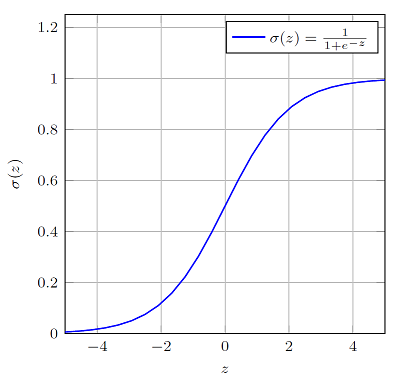

From the figure above we can observe that the Sigmoid function is bouned between 0 and 1. Such that if $z$ goes toward infinity ($z \to \infty$) then $\sigma(z)=\frac{1}{1+e^{-\infty}}=1$, and on the other hand when $z$ goes toward minus infinity ($z \to -\infty$) then $\sigma(z)=\frac{1}{1+e^{\infty}}=0$. Thus, we conclude that sigmoid function takes real number values as input and transforms them to values in the range [0,1] with $\sigma(0) = 0.5$.

In logistic regression, the activation function simply becomes the sigmoid function that we defined earlier, which is illustrated in the following figure:

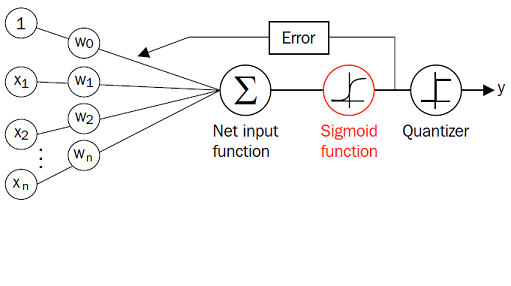

The output of the Sigmoid activation function is interpreted as the probability of particular sample belonging to class 1 $\sigma(z)=p\left(y=1|\mathbf{x,w}\right)$ given set of features $x$ and set of weights $w$. For instance, assume we have a binary classifier to classify samples of Iris-Versicolor ($y=1$) vs. Iris-Setosa ($y=0$). Then if we compute $\sigma(z)=0.9$, it means that the chance that this sample is an Iris-Versicolor flower is $90\%$. Similarly, the probability that this flower is an Iris-Setosa flower can be calculated as $p\left(y=0|\mathbf{x,w}\right) = 1 - p\left(y=1|\mathbf{x,w}\right) = 0.1$ or $10\%$.


So far we have discussed how Logistic regression makes predictions, but we did not talk about the cost function and learning process. Unlike the case in linear regression where we used MSE cost function, in logistic regression we use log-loss (also known as binary cross entropy (BCE)), given by the equation below:

\begin{equation}
    J(w)=\frac{1}{N} \sum_{i=1}^{N} [-y_{i}\cdot\log\left(\hat{y}_{i}\right)-\left(1-y_{i}\right)\cdot\log\left(1-\hat{y}_{i}\right)]
\end{equation}
where $y_{i}$ is the label  for training example $i$, $\hat{y}_{i}$ is the predicted class by applying the hypothesis or $\sigma(z)$.


For more information why we chose BCE over MSE, please refer to the lecture notes

Our main aim is to minimise our BCE cost function in order to get accurate predictions. In order to do that, we keep updating the parameter $w$ in the direction that minimises the cost function. The amount of change that we modify $w$ is called the gradient and is given by differentiating the cost function with respect to $w$. We can control how fast this gradient step is moving by introducing the learning rate ($\alpha$). This process is called Gradient Descent and is illustrated in the figure below:

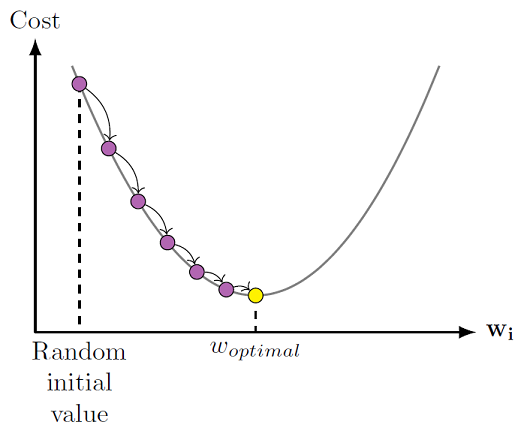


When the training is done and we want to predict the output using test data, the predicted probability can be converted into a binary outcome via a quantizer (unit step function) such that:

\begin{equation}
y_{pred} = \begin{cases}
      1 & \hat{y}\geq 0.5 \\
      0 & otherwise
   \end{cases}
\end{equation}


Reference:
"Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015


# Data Used & Problem Definition

We will use logistic regression as a binary classifier between Setosa vs other classes (verginica and versicolor grouped together). Here we say that data points with features that result in output probabilities closer to 0 are likely Setosa, while values closer to 1 are likely not Setosa. For simplicity, we will consider two features, petal length and sepal length, which can be visualised in a 2D plot.

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd

In [133]:
iris = datasets.load_iris()

In [134]:
iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']

In [135]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

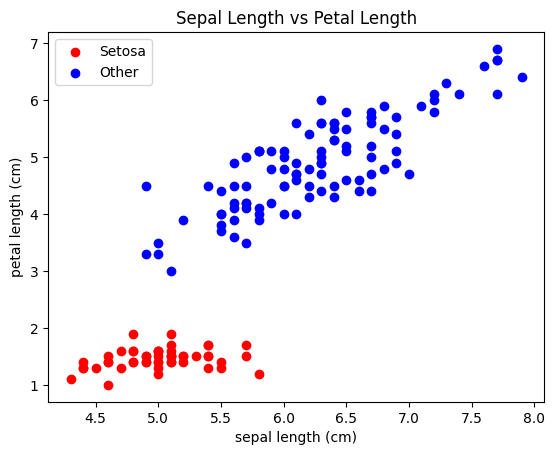

In [149]:
# Target labels are the index in iris.target_names
labels = iris_data.iloc[:,4]

# Setosa is assigned label 0, while all other classes will have a label of 1
y = np.where(labels == 0, 0, 1)

# Consider only two features - sepal length (column 0) and petal length (column 2)
# Bias term (intercept) is added to each data point (row)
X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# Plot features in 2D plot - sepal length (x-axis) vs petal length (y-axis)
feat1, feat2 = 'sepal length (cm)', 'petal length (cm)'
X_target = iris_data[iris_data.target==0]
X_other = iris_data[iris_data.target!=0]

plt.scatter(X_target[feat1],X_target[feat2],color='red',marker='o',label="Setosa")
plt.scatter(X_other[feat1],X_other[feat2],color='blue',marker='o',label='Other')
plt.title("Sepal Length vs Petal Length")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')
plt.show()

In [150]:
def sigmoid(z):
    # Sigmoid function
    return 1 / (1 + np.exp(-z))

In [151]:
def cost(Y, y):
    # log-loss or Binary Cross Entropy (BCE)
    eps = 1e-15 # to avoid numerical error at log(0)
    return (-y * np.log(Y+eps) - (1 - y) * np.log(1 - Y + eps)).mean()

In [152]:
def plot_cost(loss):
    # Function for plotting the cost vs iterations.
    plt.plot(range(1, len(loss) + 1), loss)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    # plt.savefig('plot.pdf')
    plt.show()

In [153]:
def predict(X, W):
    # Function for predicting on test data (see Task 1)
    prediction = sigmoid(np.dot(X, W))
    return prediction.round()

In [154]:
def fit(alpha, num_iter, X, y):
    # weights initialization
    W = np.zeros(X.shape[1])
    loss_list = []
    for i in range(num_iter):
        # Feed forward
        z = np.dot(X, W)
        Y = sigmoid(z)
        # Gradient
        W += alpha * (np.dot(X.T, (y-Y)) / y.size)
        loss = cost(Y, y)
        loss_list.append(loss)

        if i % 100 == 0:
            print(f'iteration: {i+1} \t', f'cost: {loss} \t', f'weights: {W} \t')
    plot_cost(loss_list)
    # This function will return the final weights as an array
    return W

iteration: 1 	 cost: 0.6931471805599433 	 weights: [0.00166667 0.01253    0.01391667] 	
iteration: 101 	 cost: 0.39716904888478627 	 weights: [-0.05071148 -0.07762237  0.42536019] 	
iteration: 201 	 cost: 0.29984517309777964 	 weights: [-0.10551432 -0.23097319  0.68989714] 	
iteration: 301 	 cost: 0.2382094249373507 	 weights: [-0.14864573 -0.34969591  0.90262115] 	
iteration: 401 	 cost: 0.196815362215292 	 weights: [-0.18374873 -0.44513976  1.07818086] 	
iteration: 501 	 cost: 0.1674853678274873 	 weights: [-0.21316007 -0.52436457  1.22669262] 	
iteration: 601 	 cost: 0.14576052746256243 	 weights: [-0.23838792 -0.5918273   1.3549739 ] 	
iteration: 701 	 cost: 0.12908024748143987 	 weights: [-0.26043675 -0.65044743  1.46769223] 	
iteration: 801 	 cost: 0.11589461609963037 	 weights: [-0.27999968 -0.70221333  1.56813002] 	
iteration: 901 	 cost: 0.1052199140543055 	 weights: [-0.29757115 -0.74852835  1.65866121] 	
iteration: 1001 	 cost: 0.0964055186179073 	 weights: [-0.31351439 -0.7

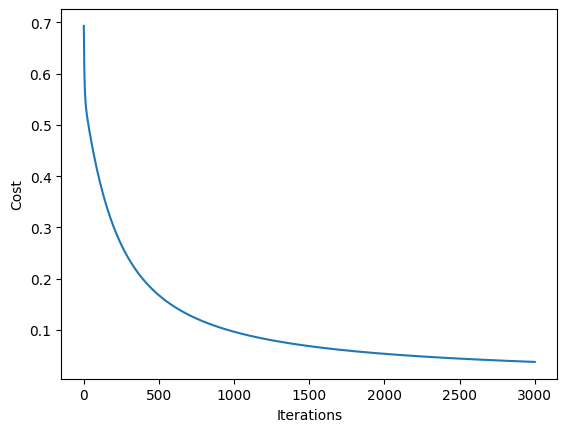

In [155]:
alpha = 0.01
num_iter = 3000
model_weights = fit(alpha, num_iter, X,y)

In [156]:
predictions = predict(X, model_weights)
pred = predictions.astype('int')
true = y.astype('int')

# Evaluation Metrics

Evaluation metrics are used to measure the performance of machine learning models. It is very important to evaluate the model after training takes place to decide whether the model can be implemented in the project or not. There are a variety of techniques used for evaluation such as classification accuracy, loss and confusion matrix. Confusion matrix is very useful tool for evaluation. It visualises the predictions for a classification problem against the real labels in table format.  Each row of the matrix represents the instances of real labels while each column represents the instances of predicted labels. The values of the confusion matrix are denoted by four categories, namely, true positive (TP), true negative (TN), false negative (FN) and false positive (FP). The outcomes of a confusion matrix can be visualised in Figure


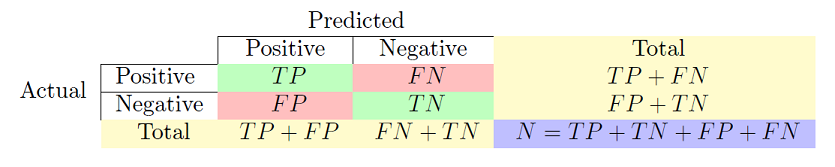

In [157]:
def compute_confusion_matrix(true, pred):

    num_cls = len(np.unique(true)) # Number of classes
    result = np.zeros((num_cls, num_cls))

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1

    return result

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

Confusion matrix result: 
[[ 50.   0.]
 [  0. 100.]]
accuracy = 100.00%


## Task 1 [40 marks]

In the provided code, the network's performance was assessed using the same training dataset for both training and evaluation, which is not a recommended practice in evaluating machine learning algorithms. Your task is to adjust the code to split the data into two separate sets: a training set and a testing set. The training set should account for 80% of the original data, while the remaining 20% will constitute the test data. Additionally, as part of your report, you should address the following points:

1. **Importance of Having Two Datasets**: In your report, discuss the significance of using two distinct datasets (training and testing) when evaluating a machine learning algorithm.

2. **Code for Data Splitting**: Provide the code you used to divide the original dataset into the training and testing datasets. Ensure that the split is random and maintains data integrity.

3. **Confusion Matrix and Accuracy**: After modifying the code and training the model on the training dataset, calculate the confusion matrix and total accuracy of the algorithm using the testing dataset. Include these performance metrics in your report to assess the model's effectiveness in classifying data.

Please ensure that your code is well-documented and your report provides clear explanations of the concepts discussed.


In [158]:
np.random.seed(42)
num_samples = X.shape[0]
indices = np.arange(num_samples)
np.random.shuffle(indices)

X_shuffled = X[indices]
y_shuffled = y[indices]

# 80% training, 20% testing
split_index = int(0.8 * num_samples)

X_train, X_test = X_shuffled[:split_index], X_shuffled[split_index:]
y_train, y_test = y_shuffled[:split_index], y_shuffled[split_index:]


iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00141667 0.01115    0.0130875 ] 	
iteration: 101 	 cost: 0.40794289595732897 	 weights: [-0.05588709 -0.09415578  0.4294503 ] 	
iteration: 201 	 cost: 0.30613730120965427 	 weights: [-0.11259674 -0.2498409   0.70045062] 	
iteration: 301 	 cost: 0.2425281406905338 	 weights: [-0.15692725 -0.36970005  0.91682871] 	
iteration: 401 	 cost: 0.20013780049598803 	 weights: [-0.19286325 -0.46577868  1.09466474] 	
iteration: 501 	 cost: 0.1702392772265611 	 weights: [-0.22289905 -0.54540531  1.24472666] 	
iteration: 601 	 cost: 0.14815623147656135 	 weights: [-0.24862156 -0.61314996  1.37414342] 	
iteration: 701 	 cost: 0.1312320111660807 	 weights: [-0.27107818 -0.67198428  1.48774294] 	
iteration: 801 	 cost: 0.11786983482599848 	 weights: [-0.29098734 -0.72392289  1.5888964 ] 	
iteration: 901 	 cost: 0.10706109798602162 	 weights: [-0.30885943 -0.77038346  1.68003007] 	
iteration: 1001 	 cost: 0.09814099669224806 	 weights: [-0.32506829 -

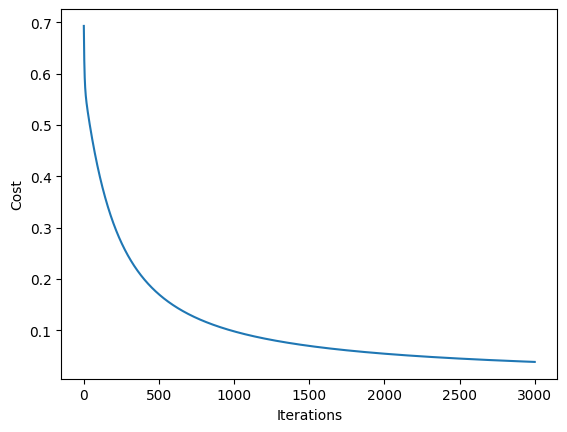

Confusion matrix result: 
[[ 7.  0.]
 [ 0. 23.]]
Accuracy = 100.00%


In [159]:
alpha = 0.01
num_iter = 3000
model_weights = fit(alpha, num_iter, X_train, y_train)

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

# Calculate accuracy
diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('Accuracy = {:.2f}%'.format(accuracy * 100))


## Task 2 [20 marks]

In the provided code, the primary objective was to classify Iris-Setosa versus other classes. Your task is to modify the code so that it can classify Iris-Versicolor versus other classes and Iris-Virginica versus other classes separately. For each case, you should divide the dataset into training and testing subsets. Additionally, your report should cover the following aspects:

1. **Dataset Adjustment Code**: Provide the code you used to adjust the dataset for each classification scenario, ensuring that you have separate training and testing data for Iris-Versicolor versus other classes and Iris-Virginica versus other classes.

2. **Reporting Weights**: Present the final weights obtained for each classification case.

3. **Performance Comparison**: Compare the performance of the network for each classification case. Discuss any differences in performance and provide justifications for why the performance may vary between the two cases. Consider factors such as dataset characteristics and class separability.

Ensure that your code modifications are clearly documented, and your report provides insightful explanations for the observed differences in classification performance.


iteration: 1 	 cost: 0.6931471805599435 	 weights: [-0.00175   -0.009775  -0.0044875] 	
iteration: 101 	 cost: 0.6222664178969822 	 weights: [-0.0354482  -0.15676772  0.08163052] 	
iteration: 201 	 cost: 0.6083638661281934 	 weights: [-0.05144212 -0.2207225   0.17865011] 	
iteration: 301 	 cost: 0.6002259298866598 	 weights: [-0.06228189 -0.27034106  0.252684  ] 	
iteration: 401 	 cost: 0.5953297409920476 	 weights: [-0.06931856 -0.30932998  0.30998571] 	
iteration: 501 	 cost: 0.5923106280653468 	 weights: [-0.07350655 -0.34032345  0.35488849] 	
iteration: 601 	 cost: 0.5904080331158227 	 weights: [-0.0755292  -0.36521682  0.39044434] 	
iteration: 701 	 cost: 0.589185192133165 	 weights: [-0.07588424 -0.38539619  0.41884618] 	
iteration: 801 	 cost: 0.5883843690000111 	 weights: [-0.07494061 -0.4018922   0.44170111] 	
iteration: 901 	 cost: 0.5878498373676228 	 weights: [-0.07297619 -0.41548321  0.46020843] 	
iteration: 1001 	 cost: 0.5874856003666445 	 weights: [-0.07020333 -0.426765

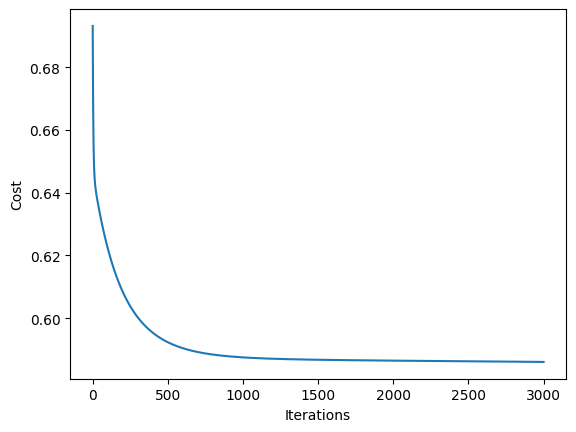

Confusion matrix result Versicolor vs Other:
[[18.  1.]
 [11.  0.]]
Accuracy = 60.00%


In [160]:
labels_versicolor = iris_data.iloc[:, 4]
# Iris-Versicolor as 1, Setosa and Virginica as 0
y_versicolor = np.where(labels_versicolor == 1, 1, 0)

X_versicolor = iris_data.iloc[:, [0, 2]]
intercept = np.ones((X_versicolor.shape[0], 1))
X_versicolor = np.concatenate((intercept, X_versicolor), axis=1)

# Shuffle the data randomly
np.random.seed(42)
indices = np.arange(X_versicolor.shape[0])
np.random.shuffle(indices)

X_versicolor = X_versicolor[indices]
y_versicolor = y_versicolor[indices]

# 80% training, 20% testing
split_index = int(0.8 * len(X_versicolor))
X_train_versicolor, X_test_versicolor = X_versicolor[:split_index], X_versicolor[split_index:]
y_train_versicolor, y_test_versicolor = y_versicolor[:split_index], y_versicolor[split_index:]

alpha = 0.01
num_iter = 3000
weights_versicolor = fit(alpha, num_iter, X_train_versicolor, y_train_versicolor)

# Make predictions for Versicolor vs Other
predictions_versicolor = predict(X_test_versicolor, weights_versicolor)
pred_versicolor = predictions_versicolor.astype('int')
true_versicolor = y_test_versicolor.astype('int')

conf_matrix_versicolor = compute_confusion_matrix(true_versicolor, pred_versicolor)
print('Confusion matrix result Versicolor vs Other:')
print(conf_matrix_versicolor)

diagonal_sum = conf_matrix_versicolor.trace ()
sum_of_all_elements = conf_matrix_versicolor.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('Accuracy = {:.2f}%'.format(accuracy * 100))

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00183333 0.00809167 0.00077083] 	
iteration: 101 	 cost: 0.5512307406263122 	 weights: [ 0.08197051  0.23244716 -0.25472661] 	
iteration: 201 	 cost: 0.48153625375260156 	 weights: [ 0.13981786  0.37329746 -0.46892556] 	
iteration: 301 	 cost: 0.4376199370764489 	 weights: [ 0.18754292  0.48664646 -0.63772893] 	
iteration: 401 	 cost: 0.4076417531308795 	 weights: [ 0.22837715  0.5812228  -0.77634361] 	
iteration: 501 	 cost: 0.3858124244852444 	 weights: [ 0.26433318  0.66247571 -0.89402639] 	
iteration: 601 	 cost: 0.36909419813889527 	 weights: [ 0.29669994  0.73390612 -0.99657756] 	
iteration: 701 	 cost: 0.35577636667381835 	 weights: [ 0.32633424  0.79784815 -1.08777942] 	
iteration: 801 	 cost: 0.3448333823493357 	 weights: [ 0.35382693  0.85591524 -1.17019732] 	
iteration: 901 	 cost: 0.3356167654239677 	 weights: [ 0.37959912  0.9092597  -1.24563398] 	
iteration: 1001 	 cost: 0.32769755616091595 	 weights: [ 0.40395983  0.9

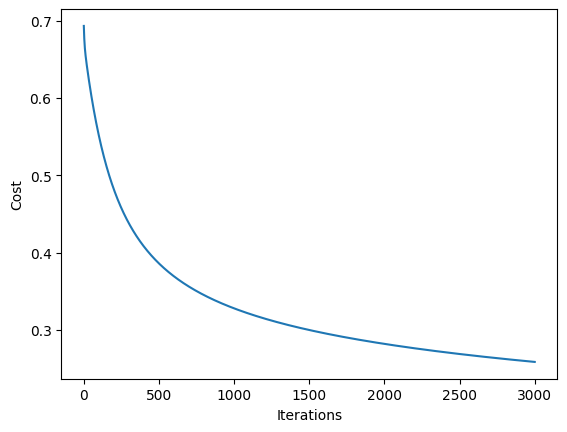

Confusion matrix result virginica vs Other:
[[12.  0.]
 [ 1. 17.]]
Accuracy = 96.67%


In [161]:
# Virginica as 0, Setosa and Versicolor as 1
labels_virginica = iris_data.iloc[:, 4]
y_virginica = np.where(labels_virginica == 2, 0, 1)

X_virginica = iris_data.iloc[:, [0, 2]]
intercept = np.ones((X_virginica.shape[0], 1))
X_virginica = np.concatenate((intercept, X_virginica), axis=1)

np.random.seed(42)
indices = np.arange(X_virginica.shape[0])
np.random.shuffle(indices)

X_virginica = X_virginica[indices]
y_virginica = y_virginica[indices]

# 80% training, 20% testing
split_index = int(0.8 * len(X_virginica))
X_train_virginica, X_test_virginica = X_virginica[:split_index], X_virginica[split_index:]
y_train_virginica, y_test_virginica = y_virginica[:split_index], y_virginica[split_index:]



alpha = 0.01
num_iter = 3000
weights_virginica = fit(alpha, num_iter, X_train_virginica, y_train_virginica)

predictions_virginica = predict(X_test_virginica, weights_virginica)
pred_virginica = predictions_virginica.astype('int')
true_virginica = y_test_virginica.astype('int')

conf_matrix_virginica = compute_confusion_matrix(true_virginica, pred_virginica)
print('Confusion matrix result virginica vs Other:')
print(conf_matrix_virginica)

diagonal_sum = conf_matrix_virginica.trace ()
sum_of_all_elements = conf_matrix_virginica.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('Accuracy = {:.2f}%'.format(accuracy * 100))


## Task 3 [40 marks]

In this tutorial, you were introduced to the parameter $\alpha$, also known as the learning rate. A fixed value of $0.01$ was chosen for our algorithm. Your task is to investigate the effect of selecting different values of $\alpha$ for the Iris-Setosa vs. All classifier. In your report, please cover the following aspects:

1. **Variation of $\alpha$**: Experiment with different values of $\alpha$ (e.g., 0.0001, 0.1, 1, 100). Note that you may want to print the loss more frequently to observe the initial behavior of the algorithm when using different $\alpha$ values.

2. **Code Execution**: Run the code for each of the specified $\alpha$ values and record the performance of the network for each case.

3. **Visualisation**: Include a graphical representation of the cost versus epochs for each $\alpha$ value. Additionally, report the accuracy of the test data and provide confusion matrices for each $\alpha$ value.

4. **Discussion**: In your own words, explain why the performance of the algorithm changes when using different $\alpha$ values. Discuss the effect of the learning rate on the gradient descent process, considering aspects like convergence speed, stability, and the risk of overshooting.

Ensure that your code adjustments are well-documented, and your report provides clear insights into the impact of varying the learning rate on the performance of the Iris-Setosa vs. All classifier.


iteration: 1 	 cost: 0.6931471805599435 	 weights: [1.83333333e-05 8.09166667e-05 7.70833333e-06] 	
iteration: 101 	 cost: 0.6868295577837696 	 weights: [0.0017891  0.0078017  0.00053365] 	
iteration: 201 	 cost: 0.6815786536780734 	 weights: [0.00344584 0.01484717 0.00061488] 	
iteration: 301 	 cost: 0.6771565994893324 	 weights: [0.005002   0.02129785 0.00030618] 	
iteration: 401 	 cost: 0.6733789473394156 	 weights: [ 0.00646944  0.02722478 -0.00034412] 	
iteration: 501 	 cost: 0.6701028892511754 	 weights: [ 0.0078586   0.03269048 -0.00129353] 	
iteration: 601 	 cost: 0.6672179241275483 	 weights: [ 0.00917865  0.0377498  -0.00250474] 	
iteration: 701 	 cost: 0.6646385474346711 	 weights: [ 0.01043764  0.04245092 -0.00394506] 	
iteration: 801 	 cost: 0.6622985671455712 	 weights: [ 0.01164261  0.04683606 -0.0055858 ] 	
iteration: 901 	 cost: 0.6601467043987175 	 weights: [ 0.01279977  0.05094227 -0.00740185] 	
iteration: 1001 	 cost: 0.6581431975616998 	 weights: [ 0.01391455  0.05

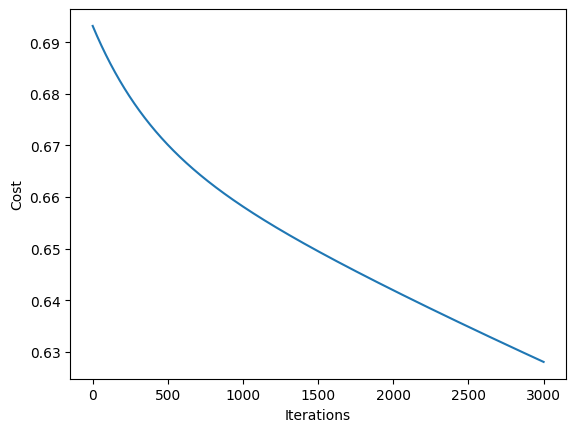

Confusion matrix for a = 0.0001:
[[ 0. 12.]
 [ 0. 18.]]
Accuracy = 60.00%
iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.01833333 0.08091667 0.00770833] 	
iteration: 101 	 cost: 0.32718705202290826 	 weights: [ 0.40726421  0.96645217 -1.32616249] 	
iteration: 201 	 cost: 0.281482113624064 	 weights: [ 0.60559527  1.33683325 -1.8456386 ] 	
iteration: 301 	 cost: 0.2582357270724896 	 weights: [ 0.76461698  1.59956103 -2.21456226] 	
iteration: 401 	 cost: 0.24290029603150978 	 weights: [ 0.90451507  1.81027759 -2.51219282] 	
iteration: 501 	 cost: 0.2316690162675839 	 weights: [ 1.03221637  1.98811294 -2.76509851] 	
iteration: 601 	 cost: 0.22296560555477846 	 weights: [ 1.1510981   2.14241039 -2.98609156] 	
iteration: 701 	 cost: 0.21597265567491242 	 weights: [ 1.26314588  2.27866798 -3.18265705] 	
iteration: 801 	 cost: 0.2102072348946428 	 weights: [ 1.36966615  2.40050196 -3.35969755] 	
iteration: 901 	 cost: 0.2053592391350383 	 weights: [ 1.47158321  2.51046699 -3.520668  ] 

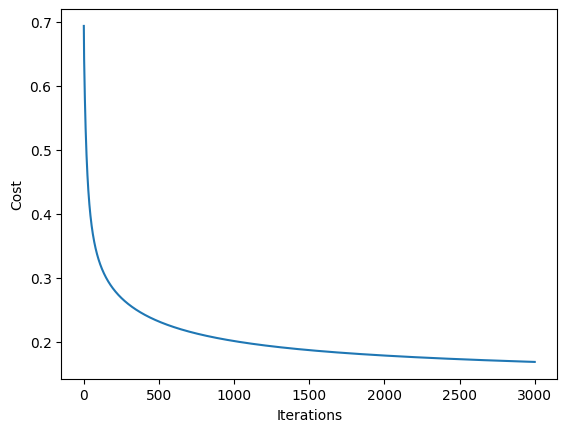

Confusion matrix for a = 0.1:
[[12.  0.]
 [ 1. 17.]]
Accuracy = 96.67%
iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.18333333 0.80916667 0.07708333] 	
iteration: 101 	 cost: 2.395023729340039 	 weights: [ 3.28295475  7.64452507 -9.09197523] 	
iteration: 201 	 cost: 0.3930047608538538 	 weights: [  4.6773164    9.45144671 -12.40780836] 	
iteration: 301 	 cost: 0.2980631037944722 	 weights: [  5.29423244   9.34375398 -12.54663379] 	
iteration: 401 	 cost: 0.2842627916560621 	 weights: [  5.85701063   9.19795577 -12.49481409] 	
iteration: 501 	 cost: 0.27927310133447336 	 weights: [  6.40205911   9.05091611 -12.42085734] 	
iteration: 601 	 cost: 0.27584040952721484 	 weights: [  6.93428526   8.90753336 -12.34610006] 	
iteration: 701 	 cost: 0.27275721794598246 	 weights: [  7.45481813   8.76865143 -12.27428042] 	
iteration: 801 	 cost: 0.2697891792671236 	 weights: [  7.96411901   8.63431013 -12.20601237] 	
iteration: 901 	 cost: 0.26689000296037324 	 weights: [  8.46252864   8.50

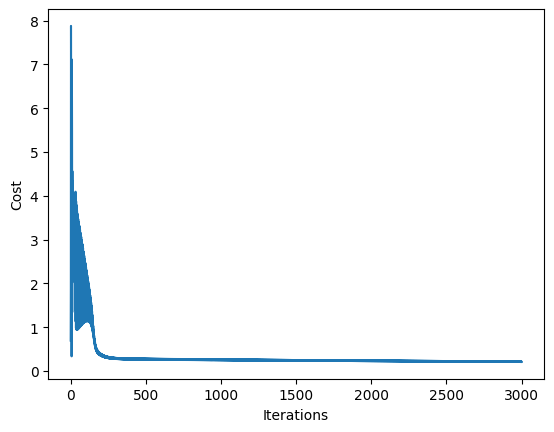

Confusion matrix for a = 1:
[[12.  0.]
 [ 1. 17.]]
Accuracy = 96.67%
iteration: 1 	 cost: 0.6931471805599435 	 weights: [18.33333333 80.91666667  7.70833333] 	
iteration: 101 	 cost: 8.768092490688787 	 weights: [  295.48486967   562.26771899 -1053.10965046] 	
iteration: 201 	 cost: 4.36672007927109 	 weights: [  457.9914534    862.49886857 -1294.97215634] 	
iteration: 301 	 cost: 4.029621084276368 	 weights: [  529.38418499   886.04553624 -1311.97828004] 	
iteration: 401 	 cost: 4.029526351235337 	 weights: [  582.09231402   880.62692069 -1317.38420088] 	
iteration: 501 	 cost: 4.082225769633749 	 weights: [  635.10662038   876.06686842 -1319.64719567] 	
iteration: 601 	 cost: 4.014458595639233 	 weights: [  687.54890769   868.60849789 -1324.76985304] 	
iteration: 701 	 cost: 4.029523912798945 	 weights: [  739.24648077   862.02775496 -1327.63033998] 	
iteration: 801 	 cost: 3.8925388090281303 	 weights: [  790.74342726   861.61396736 -1325.86505636] 	
iteration: 901 	 cost: 3.3085337

<ipython-input-150-bad0c6ba73d9>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


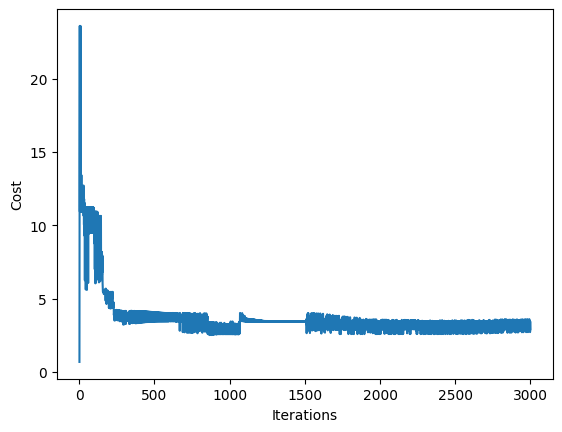

Confusion matrix for a = 100:
[[12.  0.]
 [ 0. 18.]]
Accuracy = 100.00%


In [165]:
# Target labels are the index in iris.target_names
labels = iris_data.iloc[:,4]

# Setosa is assigned label 0, while all other classes will have a label of 1
y = np.where(labels == 2, 0, 1)

X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# 80% training, 20% testing
split_index = int(0.8 * num_samples)

learning_rates = [0.0001, 0.1, 1, 100]
num_iter = 3000

for i in learning_rates:
    weights = fit(i, num_iter, X_train, y_train)

    predictions = predict(X_test, weights)
    pred = predictions.astype('int')
    true = y_test.astype('int')

    conf_matrix = compute_confusion_matrix(true, pred)
    print(f'Confusion matrix for a = {i}:')
    print(conf_matrix)

    diagonal_sum = conf_matrix.trace()
    sum_of_all_elements = conf_matrix.sum()
    accuracy = diagonal_sum / sum_of_all_elements
    print('Accuracy = {:.2f}%'.format(accuracy * 100))
